# Tasca M5 T01

In [1]:
#Importamos todas las librerías a utilizar
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import pingouin as pg
from scipy.stats import mannwhitneyu
import warnings


#configuramos pd para que nos muestre todas las columnas
pd.set_option('display.max_columns', None)

#suprimimos los warnings
warnings.filterwarnings("ignore")

## Importación, descripción y preprocesamiento del data set

In [2]:
#Importamos el dataset desde el archivo 'Lligues europees UEFA.csv'

df = pd.read_csv("Lligues europees UEFA.csv", sep='\;', encoding='latin-1', engine='python')

In [3]:
#Primera aproximación al dataset
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


A partir de una primera observación general del dataset podemos decir que: 
- reune varias features de la temporada de fútbol 2021-2022 de las principales ligas europeas 
- cada observación (fila) representa los datos de un equipo ordenados por ranking
- La columna 'Country' agrupa los equipos por países
- Tenemos dos columnas que presentan proporciones (Pts/G y xGD90)
- Cinco columnas con variables categóricas: 'Squad', 'Country', 'Last5', 'Top Team Scorer' y 'Goalkeeper'

In [4]:
# info del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

Tenemos un dataframe con 20 columnas y 98 observaciones. 5 columnas son object, 5 float y 10 int

Según las columnas tenemos: 
- Rk: Ranking
- Squad: Nombre del equipo
- Country: País del equipo (ESP, FRA, ING, GER, ITA)
- LgRk: Ranking de Liga 
- MP: Partidos jugados (Partidos Jugados):
- W: Número de partidos ganados 
- D: Número de partidos empatados 
- L: Número de partidos perdidos 
- GF: Goles a Favor
- GA: Goles en Contra
- GD: Diferencia de Goles
- Pts: Puntos
- Pts/G: Puntos por Partido
- xG: Número esperado de goles marcados
- xGA: Número esperado de goles recibidos.
- xGD: Diferencia entre goles esperados a favor y goles esperados en contra.
- xGD/90: Diferencia de goles esperados ajustada por 90 minutos.
- Last 5 : Información sobre los últimos 5 partidos.
- Attendance: Número de asistentes a los partidos.
- Top Team Scorer: Nombre del máximo goleador del equipo.
- Goalkeeper: Nombre del portero del equipo.

In [5]:
#comprobación de nulos
nulos = df.isnull().sum()

if nulos.all() == 0: 
    print("dataset sin nulos")
else: 
    print("dataset con nulos")

dataset sin nulos


# Hypothesis test 

Para cumplir con los ejercicios planteados realizaremos tres tipos de hypothesis test: 

- Prueba de t para evaluar si la media de asistencia de la temporada 2021 - 2022 es significativamente diferente del promedio histórico de asistencia. 
- Prueba t de dos muestras para comparar la media de goles a favor entre los equipos de la liga española y los equipos de la liga alemana.
- Prueba ANOVA para comparar la media los goles en contra entre las 5 ligas y otra prueba ANOVA para comparar la media de asistencia de las 5 ligas. 

En el t-test de dos variables y en el ANOVA realizaremos, previo al test de hipótesis, una comprobación del cumplimiento de las condiciones (independencia, normalidad, homocedasticidad) de cada conjunto de datos. 

Para los todos los tests utilizaremos un α de 0.05

Los tres test los realizaremos con el paquete scipy.stats, pero también utilizaremos el paquete pingouin. 

## Prueba de t-test de una sola variable 

En este test utilizaremos una t-test para comparar la media de asistencia de la temporada 2021-2022 con la media de asistencia de la última década. Asimilaremos este último valor como la media poblacional. Esta información la obtuvimos de: https://www.statista.com/statistics/261213/european-soccer-leagues-average-attendance/ 

Así, las hipótesis son: 

- H0: La media de asistencia de la temporada 2021-2022 y la media de asistencia de los últimos 10 años son iguales. 
- H1: La media de asistencia de la temporada 2012-2022 es menor que la media de asistencia de los últimos 10 años. 

In [6]:
#creamos una lista que contiene las asistencias promedio de los últimos 10 años. 

attendance_pop = [30317.2, 30209, 30163.6, 29730.8, 31517.4, 31348.6, 31833.8, 3559.6, 24924.2, 33211.4]

In [7]:
#calculamos las medias a compartir

#media poblacional
attendance_pop_mean = np.round(np.mean(attendance_pop), 3)

#media de la muestra
sample_att_mean = np.round(df["Attendance"].mean(), 3)

print("La media de asistencia de la población es: {}\nLa media de asistencia de la muestra es: {}".format(attendance_pop_mean, sample_att_mean))

La media de asistencia de la población es: 27681.56
La media de asistencia de la muestra es: 24239.857


La media de la muestra (asistencia promedio en la temporada 2021-22) es menor que la media poblacional. Correremos el t-test para comprobar si esta diferencia es estadísticamente significativa.

Asumimos que si el p-valor es menor que alpha rechazaremos la hipótesis nula

In [8]:
# test de 1 sample con stats

# definimos el nivel de significancia
alpha = 0.05

#corremos la prueba
results_ttest = stats.ttest_1samp(a = df["Attendance"],              
                 popmean = attendance_pop_mean)

#dividimos el pvalue en 2 pues es una prueba de cola izquierda esto significa que estamos buscando un "menor que" 
#en la hipótesis alternativa
pvalue = results_ttest.pvalue/2

print("pvalue =",np.round(pvalue, 3))

if pvalue < alpha:
    print ("Con un 95% de significancia rechazamos la hipótesis nula")
else :
    print ("Con un 95% de significancia aceptamos la hipótesis nula")


pvalue = 0.012
Con un 95% de significancia rechazamos la hipótesis nula


Es decir, que con un 95% de significancia estadística podemos afirmar que la media de asistencia de la temporada 2012-2022 fue menor que la media de asistencia de los últimos 10 años.

Sin embargo ya que el pvalue es del 1.2%, si corrieramos un t-test con un 99% de significancia estadística tendríamos que aceptar la hipótesis nula. 

Hagamos una comprobación adicional utilizando el t-statistic y los grados de libertad para calcular el pvalue

In [9]:
print("T-test=", np.round(results_ttest.statistic, 6))
print("p-value=", np.round(results_ttest.pvalue, 3) /2)
print("Grados de libertad=", results_ttest.df)

T-test= -2.290623
p-value= 0.012
Grados de libertad= 97


In [10]:
#Los grados de libertad son (n-1) siendo n el número de observaciones de la muestra
np.round(stats.t.cdf(x= -2.2906, df= 97), 3)     

0.012

Vamos a realizar el mismo test pero utilizando la librería pingouin. La ventaja de la librería pingouin es que en el argumento alternative podemos incluir qué tipo de test queremos hacer, two-tailed, greater o less dependiendo de la hipótesis alternativa. 

In [11]:
t_test_result = pg.ttest(df["Attendance"], attendance_pop_mean, alternative="less")
print("T-test de una muestra:")
print(t_test_result)

T-test de una muestra:
               T  dof alternative     p-val             CI95%   cohen-d  \
T-test -2.290623   97        less  0.012075  [-inf, 26735.11]  0.231388   

         BF10    power  
T-test  2.689  0.73557  


Comprobamos que el p-val y el T-test de la librería pingouin son iguales a los resultados del stats. 

## Prueba de t-test de dos variables

Para este test utilizaremos dos variables: 
-los goles a favor marcados por los equipos de la liga española y, 
-los goles a favor marcados por los equipos de la liga alemana


Primero, realizaremos una exploración gráfica de las medias de goles a favor (GF) marcados por los equipos de cada liga para determinar cuáles son las dos variables que nos puede interesar comparar.

Segundo, evaluaremos los supuestos del conjunto de variables con el que vamos a trabajar.

Finalmente, correremos el test. Como en el caso del test de una sola variable utilizaremos stats y pengouin. 

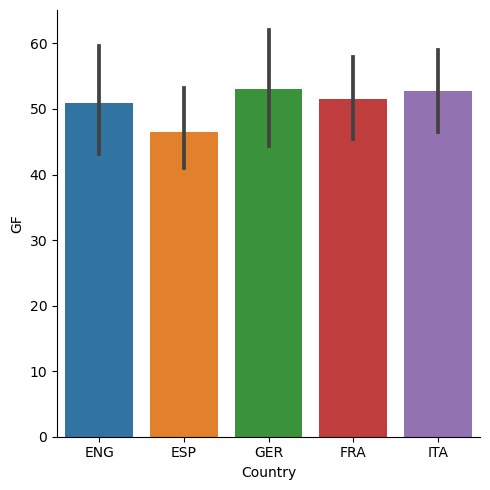

In [12]:
#barplot de "GF" por "Country"
sns.catplot(x="Country", 
       y="GF",
       data=df, 
       kind="bar")

plt.show()

En el barplot podemos ver que casi todas las medias de goles a favor de los cinco países son bastante similares a excepción de las medias España y Alemania. Por tal razón plantearemos como hipótesis: 

- H0: La media de goles a favor de la liga alemana es igual a la media de goles a favor de la liga española. 

- H1: La media de goles a favor de la liga alemana es mayor que la media de goles a favor de la liga española. 

Como en el anterior test utilizamos un left-tailed aquí redactamos la H1 con un "mayor que" para utilizar un right-tailed. 

Utilizaremos el 95% de nivel de significancia. 

Pasaremos ahora a evaluar las condiciones de las variables: 

1. Independencia: asumimos que no existe ninguna relación entre los goles a favor marcados en la liga española y los goles a favor marcados en la liga alemana. Podemos afirmar que los eventos son independientes. 

In [13]:
# normalidad - test de Shapiro-Wilk
selected_leagues = df[df['Country'].isin(['ESP', 'GER'])]
selected_columns = ['Squad', 'GF', 'Country']
goals_dataset = selected_leagues[selected_columns]


pg.normality(data=goals_dataset, dv='GF', group='Country')

,W,pval,normal
Country,,,
ESP,0.888037,0.024753,False
GER,0.923764,0.150717,True


2. normalidad: El test de Shapiro-Wilk nos dice que con el 95% de significacia hay evidencia estadística para afirmar que la muestra de goles a favor de la liga española no tiene una distribución normal, mientras que la muestra de goles a favor de la liga alemana sí tiene una distribución normal.

Visualizaremos estas conclusiones con un gráfico cuantil-cuantil

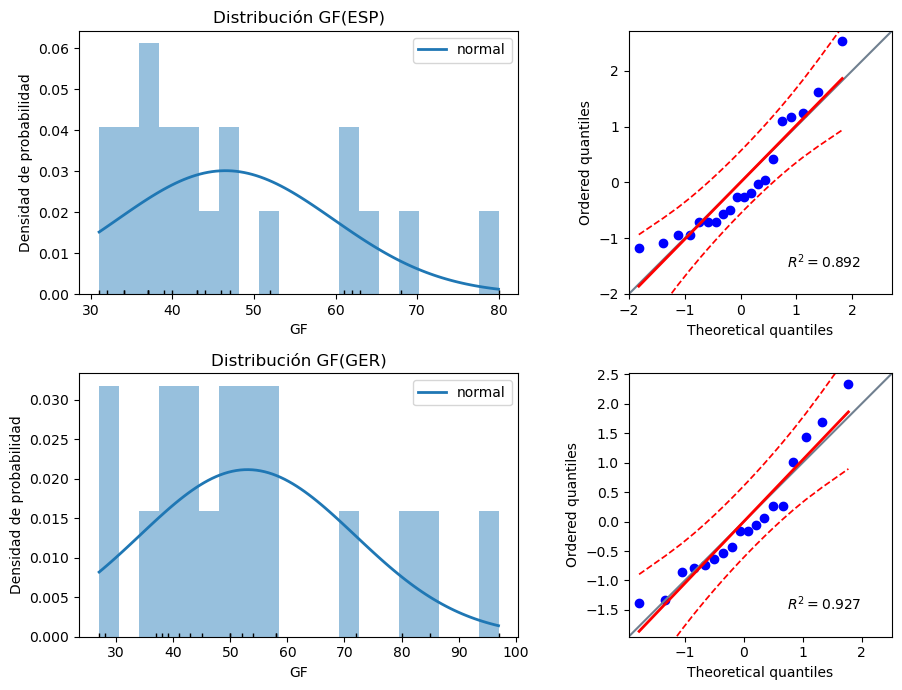

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

GF_ESP = goals_dataset.loc[goals_dataset.Country == 'ESP', 'GF']
# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(GF_ESP)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(GF_ESP), max(GF_ESP), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=GF_ESP, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(GF_ESP, np.full_like(GF_ESP, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución GF(ESP)')
axs[0, 0].set_xlabel('GF')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot
pg.qqplot(GF_ESP, dist='norm', ax=axs[0, 1])

GF_GER = goals_dataset.loc[goals_dataset.Country == 'GER', 'GF']
mu, sigma = stats.norm.fit(GF_GER)
x_hat = np.linspace(min(GF_GER), max(GF_GER), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=GF_GER, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(GF_GER, np.full_like(GF_GER, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución GF(GER)')
axs[1, 0].set_xlabel('GF')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(GF_GER, dist='norm', ax=axs[1, 1])
plt.tight_layout();

En los gráficos podemos ver como los datos de la muestra alemana se ajustan más a la distribución normal, mientras que los de la muestra española no. Aunque, hay que decir que los dos conjuntos muestran una asimetría hacia la derecha.

In [15]:
#igualdad de varianza (homocedasticidad)
pg.homoscedasticity(data=goals_dataset, dv='GF', group='Country')

,W,pval,equal_var
levene,1.335732,0.255401,True


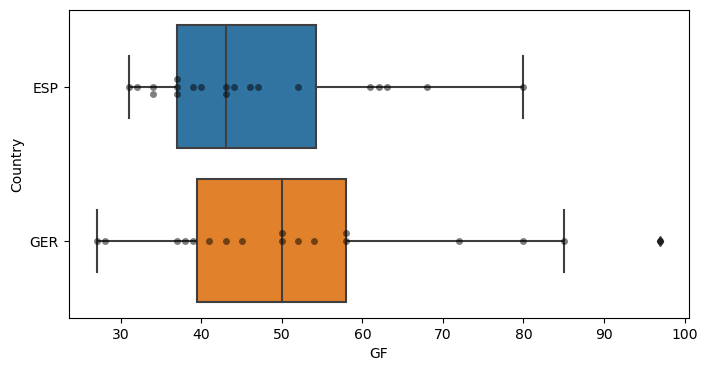

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="Country", x="GF", data=goals_dataset, ax=ax)
sns.swarmplot(y="Country", x="GF", data=goals_dataset, color='black', alpha = 0.5, ax=ax);

3. Igualdad de varianza (homocedasticidad)

Tanto en el test de homocedasticidad como en el boxplot podemos observar que la varianzas de los dos conjuntos son similares. Es decir, que no existe evidencia estadística significativa para decir que las varianzas de ambas conjuntos sean distintas. 

Al detectar en nuestro análisis de supuestos que una de las muestras no cumple con la condición de normalidad, hemos decidido realizar el test Mann-Whitney U, prueba no paramétrica, que no hace suposiciones sobre la distribución subyacente.

In [17]:
#extraemos los dos subconjuntos
ger_GF = df[df["Country"] == "GER"]["GF"]
esp_GF = df[df["Country"] == "ESP"]["GF"]

#definimos el nivel de significancia
alpha = 0.05

#corremos el test
statistic, p_value_GF = mannwhitneyu(esp_GF, ger_GF, alternative='greater')

print(f"Estadístico de prueba U: {statistic}")
print(f"Valor p: {np.round(p_value_GF, 3)}")

alpha = 0.05
if p_value_GF < alpha:
    print ("Con un 95% de significancia rechazamos la hipótesis nula")
else :
    print ("Con un 95% de significancia aceptamos la hipótesis nula")


Estadístico de prueba U: 143.0
Valor p: 0.864
Con un 95% de significancia aceptamos la hipótesis nula


Esto quiere decir que con un 95% de significancia estadística podemos afirmar que la media de goles a favor de la liga alemana es igual que la media de goles a favor de la liga española.

A manera de curiosidad correremos un test paramétrico (t-test) para comparar los resultados

In [32]:
## definimos el nivel de significancia
alpha = 0.05

#corremos la prueba
results_ttest2 = stats.ttest_ind(ger_GF, esp_GF, equal_var=False, alternative="greater")

pvalue = results_ttest2.pvalue 

print("T-test =", np.round(results_ttest2.statistic, 5))
print("pvalue =",np.round(pvalue, 3))

if pvalue < alpha:
    print ("Con un 95% de significancia rechazamos la hipótesis nula")
else :
    print ("Con un 95% de significancia aceptamos la hipótesis nula")


T-test = 1.18382
pvalue = 0.123
Con un 95% de significancia aceptamos la hipótesis nula


Esto quiere decir que con un 95% de significancia estadística podemos afirmar que la media de goles a favor de la liga alemana es igual que la media de goles a favor de la liga española.

Ahora, corramos la prueba con la librería pingouin para verificar la información.

In [33]:
result2_test = pg.ttest(ger_GF, esp_GF, paired=False, alternative='greater')
print(result2_test)

              T        dof alternative     p-val         CI95%   cohen-d  \
T-test  1.18382  30.048485     greater  0.122883  [-2.82, inf]  0.391826   

         BF10    power  
T-test  1.092  0.32222  


Comprobamos que el p-val y el T-test de la librería pingouin son iguales a los resultados del stats. 

## Prueba ANOVA para comparar más de 3 grupos

En este test compararemos 5 conjuntos: los goles en contra (GA) por cada una de las cinco ligas del data set. 

Primero Pasaremos ahora a evaluar las condiciones de las variables

Segundo, evaluaremos los supuestos del conjunto de variables con las que vamos a trabajar. 

Luego, correremos el test. Como en el caso del test de una y dos variables utilizaremos stats y pengouin.

Además, revisaremos qué grupos presentan diferencias significativas y añadiremos las correciones necesarias para evitar errores. 

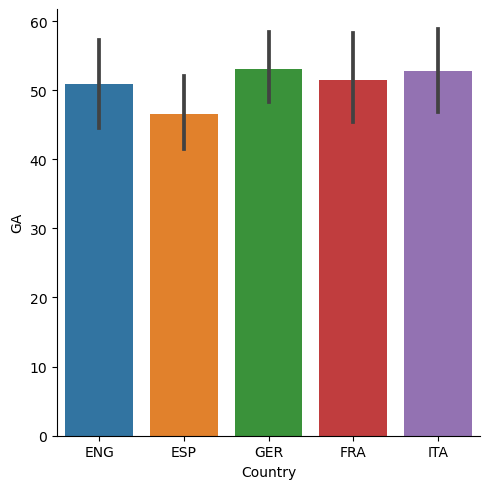

In [34]:
#barplots de diferencia de goles por cada liga
sns.catplot(x="Country", 
       y="GA",
       data=df, 
       kind="bar")

plt.show()

El gráfico nos enseña las medias de todos los países son muy similares a excepción de España. Vamos comprobar con el test de ANOVA si esas diferencias son estadísticamente significativas. Así, nuestras hipótesis serán: 

- H0: No existen diferencias entre las medias de diferencia de goles en contra de las cinco ligas más grandes de Europa

- H1: Existen diferencias entre las medias de diferencia de goles en contra de las cinco ligas más grandes de Europa.

Utilizaremos el 95% de nivel de significancia

Pasaremos ahora a evaluar las condiciones de las variables: 

1. Independencia: asumimos que no existe ninguna relación entre los goles a favor marcados en la liga española y los goles a favor marcados en la liga alemana. Podemos afirmar que los eventos son independientes. 

In [35]:
# normalidad - test de Shapiro-Wilk

pg.normality(data=df, dv='GA', group='Country')

,W,pval,normal
Country,,,
ENG,0.960419,0.552253,True
ESP,0.941665,0.257747,True
GER,0.929844,0.192969,True
FRA,0.914034,0.076111,True
ITA,0.925146,0.124496,True


2. normalidad: Con el test de Shapiro-Wilk podemos concluir que existe evidencia estadística significativa para afirmar que la muestra de goles en contra de las cinco ligas tienen una distribución normal. 

Visualizaremos estas conclusiones con un gráfico cuantil-cuantil

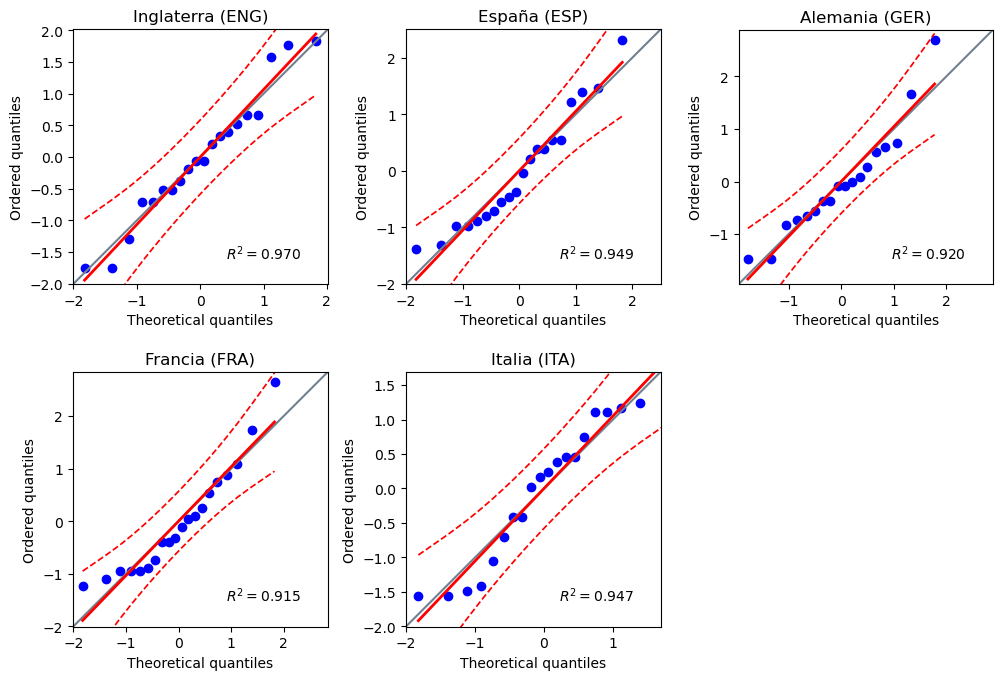

In [36]:
# Extraemos los grupos
ENG_GA = df[df["Country"] == "ENG"]["GA"]
ESP_GA = df[df["Country"] == "ESP"]["GA"]
GER_GA = df[df["Country"] == "GER"]["GA"]
FRA_GA = df[df["Country"] == "FRA"]["GA"]
ITA_GA = df[df["Country"] == "ITA"]["GA"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

pg.qqplot(ENG_GA, dist='norm', ax=axs[0, 0])
axs[0, 0].set_title('Inglaterra (ENG)')
pg.qqplot(ESP_GA, dist='norm', ax=axs[0, 1])
axs[0, 1].set_title('España (ESP)')
pg.qqplot(GER_GA, dist='norm', ax=axs[0, -1])
axs[0, -1].set_title('Alemania (GER)')
pg.qqplot(FRA_GA, dist='norm', ax=axs[1, 0])
axs[1, 0].set_title('Francia (FRA)')
pg.qqplot(ITA_GA, dist='norm', ax=axs[1, 1])
axs[1, 1].set_title('Italia (ITA)')
axs[1, 2].axis('off')


plt.tight_layout()
plt.show()

Los gráficos nos permiten concluir que todos los grupos tienen una distribución normal.

In [37]:
#igualdad de varianza (homocedasticidad)
pg.homoscedasticity(data=df, dv='GA', group='Country')

,W,pval,equal_var
levene,0.749412,0.560872,True


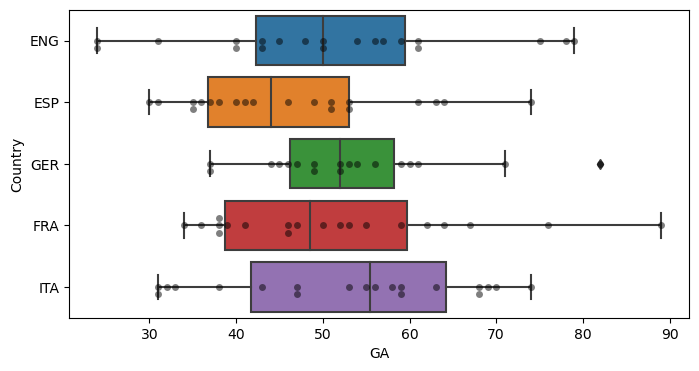

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="Country", x="GA", data=df, ax=ax)
sns.swarmplot(y="Country", x="GA", data=df, color='black', alpha = 0.5, ax=ax);

3. Igualdad de varianza (homocedasticidad)

Según la prueba de Levene y el boxplot podemos afirmar que las varianzas de los grupos son estadísticamente similares. Incluso, aunque en el boxplot veamos que el IQR de GER es más pequeño (es decir, que hay una menor dispersión de los datos o menor varianza) no tenemos evidencia estadística suficiente para afirmar que las varianzas son diferentes 

Después de haber aprobado todas condiciones podemos correr el test ANOVA. Añadiremos que incluso si el conjunto de datos no hubiera aprobado alguna condición ANOVA es un test tan robusto que podríamos correrlo sin problema. 

In [39]:
#Corremos la ANOVA
results_anova = stats.f_oneway(ENG_GA, ESP_GA, GER_GA, FRA_GA, ITA_GA)

print("pvalue =",np.round(results_anova.pvalue, 3))

if results_anova.pvalue < alpha:
    print ("Con un 95% de significancia rechazamos la hipótesis nula")
else :
    print ("Con un 95% de significancia aceptamos la hipótesis nula")

pvalue = 0.583
Con un 95% de significancia aceptamos la hipótesis nula


Esto quiere decir que con el 95 de significancia estadística podemos decir que no existen diferencias significativas entre las medias de los goles en contra de las cinco ligas europeas más importantes.

Ahora comprobemos los resultados con pingouin

In [40]:
#corremos la ANOVA en pingouin
pg.anova(data=df,
      dv="GA", 
      between="Country")

,Source,ddof1,ddof2,F,p-unc,np2
0,Country,4,93,0.715722,0.583269,0.029864


Aunque no pudimos rechazar la hipótesis nula, es decir, que no hay diferencias entre los grupos, vamos a investigar las diferencias específicas entre grupos. Para esto utilizaremos la función pairwise_tests de pingouin. En este caso al no existir diferencias no agregaremos ninguna correción. En el caso de haber diferencias podríamos añadir una test de Bonferroni o Tukey en el keyword "padjust")

In [41]:
#Comprobamos las diferencias entre los grupos con un pairwise_test
pg.pairwise_tests(data=df, 
     dv="GA", 
     between="Country",
     padjust="none")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Country,ENG,ESP,False,True,0.989300,38.000000,two-sided,0.328774,0.455,0.306629
1,Country,ENG,FRA,False,True,-0.125218,38.000000,two-sided,0.901011,0.311,-0.038811
2,Country,ENG,GER,False,True,-0.478941,34.178186,two-sided,0.635031,0.345,-0.149616
3,Country,ENG,ITA,False,True,-0.379518,38.000000,two-sided,0.706416,0.327,-0.117630
4,Country,ESP,FRA,False,True,-1.177995,38.000000,two-sided,0.246123,0.534,-0.365114
5,Country,ESP,GER,False,True,-1.720012,35.989997,two-sided,0.094020,0.99,-0.544400
6,Country,ESP,ITA,False,True,-1.479949,38.000000,two-sided,0.147131,0.73,-0.458703
7,Country,FRA,GER,False,True,-0.358978,35.116851,two-sided,0.721761,0.332,-0.112567
8,Country,FRA,ITA,False,True,-0.263565,38.000000,two-sided,0.793539,0.318,-0.081691
9,Country,GER,ITA,False,True,0.072772,35.336482,two-sided,0.942398,0.316,0.022845


En el pairwise podemos observar que en ninguno de los 10 grupos existe suficiente significancia estadística para rechazar la hipótesis nula. Es decir, que no existe ninguna diferencia significativa entre la media de los goles en contra en las cinco ligas europeas más importantes

Para poder realizar los test post-hoc realizaremos una comparación entre los cinco grupos de una variable que este algo más dispersa. Con un barplot graficaremos las medias de la variable "Attendance" a ver si puede servir como un mejor ejemplo para correr la ANOVA. Utilizaremos el mismo nivel de significancia de 0.05

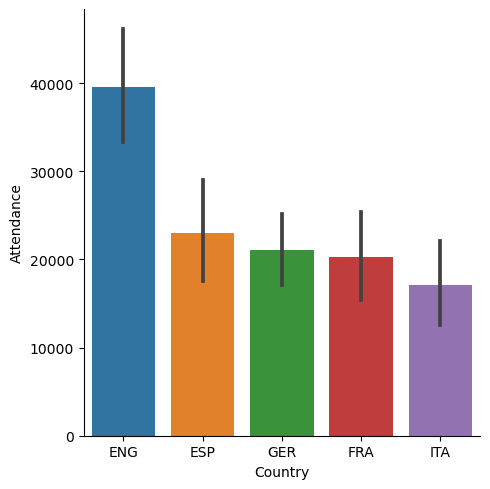

In [42]:
#barplots de diferencia de asistencia
sns.catplot(x="Country", 
       y="Attendance",
       data=df, 
       kind="bar")

plt.show()

En este caso sí que parece existir una diferencia significativa entre la asistencia a los estadios en la liga inglesa con el resto

Formularemos entonces nuestras hipótesis: 

- H0: No hay diferencias entre las medias de asistencia de las cinco principales ligas europeas
- H1: Existen diferencias entre las medias de asistencia de las cinco principales ligas europeas

In [43]:
# Definimos alpha
alpha = 0.05

# Extraemos los grupos
ENG_ATT = df[df["Country"] == "ENG"]["Attendance"]
ESP_ATT = df[df["Country"] == "ESP"]["Attendance"]
GER_ATT = df[df["Country"] == "GER"]["Attendance"]
FRA_ATT = df[df["Country"] == "FRA"]["Attendance"]
ITA_ATT = df[df["Country"] == "ITA"]["Attendance"]

#Corremos la ANOVA
results_anova_att = stats.f_oneway(ENG_ATT, ESP_ATT, GER_ATT, FRA_ATT, ITA_ATT)

print("pvalue =", np.round(results_anova_att.pvalue, 3))

if results_anova_att.pvalue < alpha:
    print ("Con un 95% de significancia rechazamos la hipótesis nula")
else :
    print ("Con un 95% de significancia aceptamos la hipótesis nula")

pvalue = 0.0
Con un 95% de significancia rechazamos la hipótesis nula


En este caso con un 95% de significancia estadistica podemos rechazar la hipótesis nula y asegurar que hay diferencias entre las medias de asistencia de las mejores ligas europeas. 

Corramos la ANOVA en pingouin para comprobar los datos

In [44]:
#corremos la ANOVA en pingouin
pg.anova(data=df,
      dv="Attendance", 
      between="Country")

,Source,ddof1,ddof2,F,p-unc,np2
0,Country,4,93,9.531074,0.000002,0.290749


Como en este caso sí que existen diferencias estadísticas vamos a utilizar la función pairwise_tests de pingouin para determinar las diferencias por grupos 

In [45]:
#Comprobamos las diferencias entre los grupos con un pairwise_test
pg.pairwise_tests(data=df, 
     dv="Attendance", 
     between="Country",
     padjust="none")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Country,ENG,ESP,False,True,3.535472,38.000000,two-sided,0.001090,29.042,1.095802
1,Country,ENG,FRA,False,True,4.342692,38.000000,two-sided,0.000101,214.736,1.345996
2,Country,ENG,GER,False,True,4.548311,30.491360,two-sided,0.000081,337.737,1.406648
3,Country,ENG,ITA,False,True,5.095117,38.000000,two-sided,0.000010,1627.928,1.579207
4,Country,ESP,FRA,False,True,0.633980,38.000000,two-sided,0.529892,0.362,0.196499
5,Country,ESP,GER,False,True,0.509395,32.392753,two-sided,0.613928,0.349,0.158282
6,Country,ESP,ITA,False,True,1.425441,38.000000,two-sided,0.162193,0.686,0.441809
7,Country,FRA,GER,False,True,-0.208364,34.550020,two-sided,0.836168,0.321,-0.065179
8,Country,FRA,ITA,False,True,0.852814,38.000000,two-sided,0.399106,0.412,0.264326
9,Country,GER,ITA,False,True,1.168108,34.668262,two-sided,0.250734,0.538,0.365571


Como lo habíamos visto en la gráfica la diferencia estadistica significativa entre las medias se presenta en los pares entre Inglaterra y los otro cuatro paises. 

Sin embargo, al ser tantos test puede que caigamos en un error del tipo I (falso positivo, rechazar un null verdadero). Por esta razón tenemos que realizar correciones, un de ellas la de Bonferroni que podemos correr en la misma función pairwise_tests de pingouin

In [46]:
#correr pairwise_test de pingouin con la corrección de Bonferroni

pg.pairwise_tests(data=df, 
     dv="Attendance", 
     between="Country",
     padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Country,ENG,ESP,False,True,3.535472,38.000000,two-sided,0.001090,0.010898,bonf,29.042,1.095802
1,Country,ENG,FRA,False,True,4.342692,38.000000,two-sided,0.000101,0.001009,bonf,214.736,1.345996
2,Country,ENG,GER,False,True,4.548311,30.491360,two-sided,0.000081,0.000806,bonf,337.737,1.406648
3,Country,ENG,ITA,False,True,5.095117,38.000000,two-sided,0.000010,0.000099,bonf,1627.928,1.579207
4,Country,ESP,FRA,False,True,0.633980,38.000000,two-sided,0.529892,1.000000,bonf,0.362,0.196499
5,Country,ESP,GER,False,True,0.509395,32.392753,two-sided,0.613928,1.000000,bonf,0.349,0.158282
6,Country,ESP,ITA,False,True,1.425441,38.000000,two-sided,0.162193,1.000000,bonf,0.686,0.441809
7,Country,FRA,GER,False,True,-0.208364,34.550020,two-sided,0.836168,1.000000,bonf,0.321,-0.065179
8,Country,FRA,ITA,False,True,0.852814,38.000000,two-sided,0.399106,1.000000,bonf,0.412,0.264326
9,Country,GER,ITA,False,True,1.168108,34.668262,two-sided,0.250734,1.000000,bonf,0.538,0.365571


En la columna p-corr podemos observar que en las primeras cuatro filas (aquellas que tienen en su grupo a ENG) aun tenemos un pvalue que nos permite rechazar la hipótesis nula. Sin embargo, la correción de Bonferroni puede ser bastante conservadora así que utilizaremos stats para correr la corrección de Tukey que es menos conservadora. Además graficaremos el test para observar los intervalos de confianza

group1,group2,meandiff,p-adj,lower,upper,reject
ENG,ESP,-16601.1,0.0008,-27855.8926,-5346.3074,True
ENG,FRA,-19224.7,0.0001,-30479.4926,-7969.9074,True
ENG,GER,-18513.6444,0.0002,-30076.8447,-6950.4442,True
ENG,ITA,-22476.25,0.0,-33731.0426,-11221.4574,True
ESP,FRA,-2623.6,0.9665,-13878.3926,8631.1926,False
ESP,GER,-1912.5444,0.9906,-13475.7447,9650.6558,False
ESP,ITA,-5875.15,0.5958,-17129.9426,5379.6426,False
FRA,GER,711.0556,0.9998,-10852.1447,12274.2558,False
FRA,ITA,-3251.55,0.9289,-14506.3426,8003.2426,False
GER,ITA,-3962.6056,0.875,-15525.8058,7600.5947,False


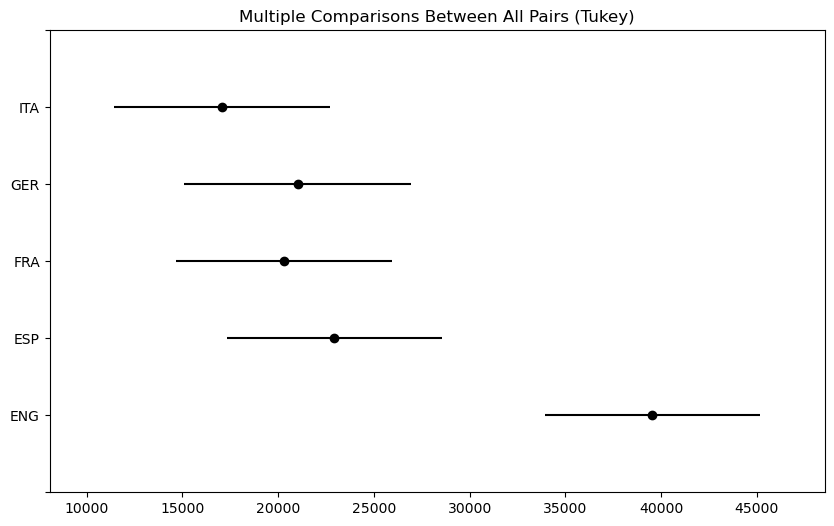

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df["Attendance"],     
                          groups=df["Country"],   
                          alpha=0.05)          

#Graficamos los intervalos de confianza
tukey.plot_simultaneous()    
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary() 

Finalmente, con la correción de Tukey podemos comprobar que realmente si existe una diferencia significativa entre la media de asistencia a los estadios de la liga de Inglaterra y las medias de asistencia de las otras ligas de europa. Además, con dicha correción evitamos caer en falsos positivos. 